# Object Detection with YOLO

Using the YOLO algorithm for object detection

## System Setup

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

os.chdir("/content/drive/My Drive/Colab Notebooks/Tracking")
!ls

Mounted at /content/drive
Association  Detection	Final_Project  movie.mp4  README.md


**ABOUT GPU** <p>

**YOLO** is an object detection algorithm.
Like most of them, it works better on GPU.
GPU will allow parallel computing (instead of sequential). It is not needed to have a vector of operation, but a matrix of operations.<p>
![CPUvsGPU…](https://www.nvidia.fr/docs/IO/144175/cpu-and-gpu.jpg)

Instead of 1 frame per second, you can run at 50 or 60 frames per second.

The version we'll use is developed by OpenCV.
OpenCV has a DNN (Deep Neural Networks) module that includes popular obstacle detection algorithms.
In this project, something similar as [this post](https://www.pyimagesearch.com/2017/08/21/deep-learning-with-opencv/) will be used!


## Import the necessary libraries
OpenCV, Matplotlib, and NumPy

In [ ]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

## Define the class YOLO and the init() function

In [ ]:
class YOLO():
    def __init__(self):
        """
        - YOLO takes an image as input. We should set the dimension of the image to a fixed number.
        - The default choice is often 416x416.
        - YOLO applies thresholding and non maxima suppression, define a value for both
        - Load the classes (.names), model configuration (cfg file) and pretrained weights (weights file) into variables
        - If the image is 416x416, the weights must be corresponding to that image
        - Load the network with OpenCV.dnn function
        """
        self.confThreshold = 0.5
        self.nmsThreshold = 0.4
        self.inpWidth = 320
        self.inpHeight = 320
        classesFile = "/content/drive/My Drive/Colab Notebooks/Tracking/Detection/YOLO/coco.names"
        self.classes = None
        with open(classesFile,'rt') as f:
            self.classes = f.read().rstrip('\n').split('\n')

        modelConfiguration = "/content/drive/My Drive/Colab Notebooks/Tracking/Main/yolov3/yolov3.cfg"
        modelWeights = "/content/drive/My Drive/Colab Notebooks/Tracking/Main/yolov3/yolov3.weights"
        self.net = cv2.dnn.readNetFromDarknet(modelConfiguration, modelWeights)
        self.net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
        self.net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

In [ ]:
def getOutputsNames(self):
    '''
    Get the names of the output layers
    '''
    # Get the names of all the layers in the network
    layersNames = self.net.getLayerNames()
    # Get the names of the output layers, i.e. the layers with unconnected outputs
    return [layersNames[i[0] - 1] for i in self.net.getUnconnectedOutLayers()]

YOLO.getOutputsNames = getOutputsNames

In [ ]:
def drawPred(self, frame, classId, conf, left, top, right, bottom):
    '''
    Draw a bounding box around a detected object given the box coordinates
    Later, we could repurpose that to display an ID
    '''
    # Draw a bounding box.
    cv2.rectangle(frame, (left, top), (right, bottom), (255, 255, 0), thickness = 4)
    label = '%0.2f' % conf
    
    # Get the label for the class name and its confidence
    if self.classes:
      assert(classId < len(self.classes))
      label = '%s:%s' % (self.classes[classId], label)
    
    # Display the label at the top of the bounding box
    labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_PLAIN, 0.5, 1)
    top = max(top, labelSize[1])
    cv2.putText(frame, label, (left, top), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), thickness = 3)
    return frame
    
YOLO.drawPred = drawPred

In [ ]:
def postprocess(self,frame, outs):
    """
    Postprocessing step. Take the output out of the neural network and interpret it.
    That ouput is used to apply NMS thresholding and confidence thresholding.
    Then, it is used to draw the bounding boxes using the dramPred function.
    """
    frameHeight = frame.shape[0]
    frameWidth = frame.shape[1]
    classIds = []
    confidences = []
    boxes = []
    # Scan through all the bounding boxes output from the network and keep only the
    # ones with high confidence scores. Assign the box's class label as the class with the highest score.
    for out in outs:
      for detection in out:
        scores = detection[5:]
        classId = np.argmax(scores)
        confidence = scores[classId]
        # Perform non maximum suppression to eliminate redundant overlapping boxes with
        # lower confidences.
        if confidence > self.confThreshold:
          center_x = int(detection[0] * frameWidth)
          center_y = int(detection[1] * frameHeight)
          width = int(detection[2] * frameWidth)
          height = int(detection[3] * frameHeight)
          left = int(center_x - width / 2)
          top = int(center_y - height / 2)
          classIds.append(classId)
          confidences.append(float(confidence))
          boxes.append([left, top, width, height])

    indices = cv2.dnn.NMSBoxes(boxes, confidences, self.confThreshold, self.nmsThreshold)
    for i in indices:
      i = i[0]
      box = boxes[i]
      left = box[0]
      top = box[1]
      width = box[2]
      height = box[3]
      # Draw the bounding boxes on the image   
      output_image, boxes = self.drawPred(frame, classIds[i], confidences[i], left, top, left + width, top + height)
    return frame, boxes

YOLO.postprocess = postprocess

In [ ]:
def inference(self,image):
    """
    Main loop.
    Input: Image
    Output: Frame with the drawn bounding boxes
    """
    # Create a 4D blob from a frame.
    blob = cv2.dnn.blobFromImage(image, 1 / 255, (self.inpWidth, self.inpHeight), [0, 0, 0], crop = False)
    # Sets the input to the network
    self.net.setInput(blob)
    # Runs the forward pass to get output of the output layers
    outs = self.net.forward(self.getOutputsNames())
    # Remove the bounding boxes with low confidence
    final_frame = self.postprocess(image, outs)
    return final_frame

YOLO.inference = inference

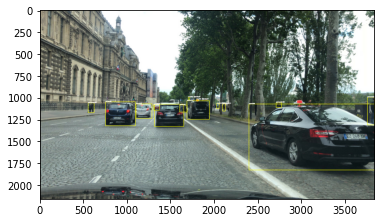

In [ ]:
import time
img = mpimg.imread("/content/drive/My Drive/Colab Notebooks/Tracking/Detection/YOLO/image_0.jpg")
yolo = YOLO()
Final_Frame = yolo.inference(img)
plt.imshow(Final_Frame)
plt.show()

### Detection on a video!



In [ ]:
os.chdir("/content/drive/My Drive/Colab Notebooks/Tracking/Detection/YOLO") 
!ls

coco.names   MOT16-13-raw.mp4  yolo_Starter.ipynb  yolov3.weights
image_0.jpg  README.md	       yolov3.cfg


In [ ]:
from moviepy.editor import VideoFileClip
video_file = "/content/drive/My Drive/Colab Notebooks/Tracking/Detection/YOLO/MOT16-13-raw.mp4"
clip = VideoFileClip(video_file).subclip(0,1)
white_clip = clip.fl_image(yolo.inference)
%time white_clip.write_videofile("movie.mp4", audio=False)

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2121728/45929032 bytes (4.6%)5898240/45929032 bytes (12.8%)9691136/45929032 bytes (21.1%)13434880/45929032 bytes (29.3%)17088512/45929032 bytes (37.2%)20832256/45929032 bytes (45.4%)24698880/45929032 bytes (53.8%)28401664/45929032 bytes (61.8%)32129024/45929032 bytes (70.0%)35594240/45929032 bytes (77.5%)39133184/45929032 bytes (85.2%)42803200/45929032 bytes (93.2%)

 96%|█████████▌| 25/26 [01:51<00:04,  4.47s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: movie.mp4 

CPU times: user 3min 34s, sys: 236 ms, total: 3min 34s
Wall time: 1min 52s


In [ ]:
import io
import base64
from IPython.display import HTML

video = io.open('movie.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls width="320" height="240">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))) 